In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt 

In [2]:
os.chdir(r'/Users/tuonganh/E-commerce-Data-Analytics')

In [3]:
!ls data

olist_customers_dataset.csv           olist_orders_dataset.csv
olist_geolocation_dataset.csv         olist_products_dataset.csv
olist_order_items_dataset.csv         olist_sellers_dataset.csv
olist_order_payments_dataset.csv      product_category_name_translation.csv
olist_order_reviews_dataset.csv


In [4]:
customers = pd.read_csv("data/olist_customers_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
order_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
product_cat_name = pd.read_csv("data/product_category_name_translation.csv")

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orders.shape

(99441, 8)

In [8]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
df_merged = orders.merge(customers, on='customer_id').merge(order_payments, on='order_id')

In [10]:
df_merged.shape

(103886, 16)

In [11]:
# Convert date columns to datetime 
date_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date",
               "order_estimated_delivery_date"]


for col in date_columns:
    df_merged[col] = pd.to_datetime(df_merged[col], format='%Y-%m-%d %H:%M:%S')

## Assign acquisition month cohort

In [12]:
# Define a function that will parse the date
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

# Create order_purchase_month
df_merged["order_purchase_month"] = df_merged["order_purchase_timestamp"].apply(get_month)

# Group by customer_id  and select the order_purchase_month value
grouping = df_merged.groupby('customer_unique_id')['order_purchase_month'] 

# Assign a minimum order_purchase_month value to the dataset
df_merged['CohortMonth'] = grouping.transform('min')

df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_month,CohortMonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,2017-10-01,2017-09-01
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,2017-10-01,2017-09-01
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,2017-10-01,2017-09-01
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,2018-07-01,2018-07-01
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,2018-08-01,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,credit_card,3,85.08,2017-03-01,2017-03-01
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,credit_card,3,195.00,2018-02-01,2018-02-01
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,credit_card,5,271.01,2017-08-01,2017-08-01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,credit_card,4,441.16,2018-01-01,2018-01-01


## Assign time offset value

In [13]:
def get_date_int(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    day = df[col].dt.day
    return year, month, day

In [14]:
# Get the integers for date parts from the `order_purchase_month` column
purchase_year, purchase_month, _ = get_date_int(df_merged, 'order_purchase_month')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month, _ = get_date_int(df_merged, 'CohortMonth')

# Calculate difference in years
years_diff = purchase_year - cohort_year

# Calculate difference in months
months_diff = purchase_month - cohort_month

df_merged['CohortIndex'] = years_diff * 12 + months_diff + 1

df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_month,CohortMonth,CohortIndex
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,2017-10-01,2017-09-01,2
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,2017-10-01,2017-09-01,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,2017-10-01,2017-09-01,2
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,2018-07-01,2018-07-01,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,2018-08-01,2018-08-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,credit_card,3,85.08,2017-03-01,2017-03-01,1
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,credit_card,3,195.00,2018-02-01,2018-02-01,1
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,credit_card,5,271.01,2017-08-01,2017-08-01,1
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,credit_card,4,441.16,2018-01-01,2018-01-01,1


# Count monthly active customers from each cohort

In [15]:
grouping = df_merged.groupby(['CohortMonth','CohortIndex'])

cohort_data = grouping['customer_unique_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='customer_unique_id')

cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
CohortMonth,,,,,,,,,,,,,,,,,,,,
2016-09-01,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,321.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02-01,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03-01,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04-01,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05-01,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06-01,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


## Calculate retention rate from scratch


In [16]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
CohortMonth,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,100.0,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.3,NaN,0.3,NaN,0.3,NaN,0.3,NaN,0.3,0.6,0.6
2016-12-01,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,100.0,0.4,0.3,0.1,0.4,0.1,0.5,0.1,0.1,NaN,0.4,0.1,0.8,0.4,0.1,0.1,0.3,0.4,0.1,NaN
2017-02-01,100.0,0.2,0.3,0.1,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.3,0.2,0.2,0.1,0.1,0.1,0.2,NaN,NaN
2017-03-01,100.0,0.5,0.4,0.4,0.3,0.2,0.2,0.3,0.3,0.1,0.4,0.2,0.2,0.1,0.2,0.2,0.1,0.2,NaN,NaN
2017-04-01,100.0,0.6,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.2,0.3,0.1,0.1,0.0,0.1,0.1,0.2,NaN,NaN,NaN
2017-05-01,100.0,0.5,0.5,0.4,0.3,0.3,0.4,0.2,0.3,0.3,0.3,0.3,0.3,0.0,0.2,0.3,NaN,NaN,NaN,NaN
2017-06-01,100.0,0.5,0.4,0.4,0.3,0.4,0.4,0.2,0.1,0.2,0.3,0.4,0.2,0.1,0.2,NaN,NaN,NaN,NaN,NaN


## Calculate average payment value

In [17]:
# Calculate the average of the payment_value column
cohort_data = grouping['payment_value'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 

average_payment = cohort_data.pivot(index='CohortMonth', columns='CohortIndex',values='payment_value')

average_payment = average_payment.round(1)

## Visualize average quantity metric


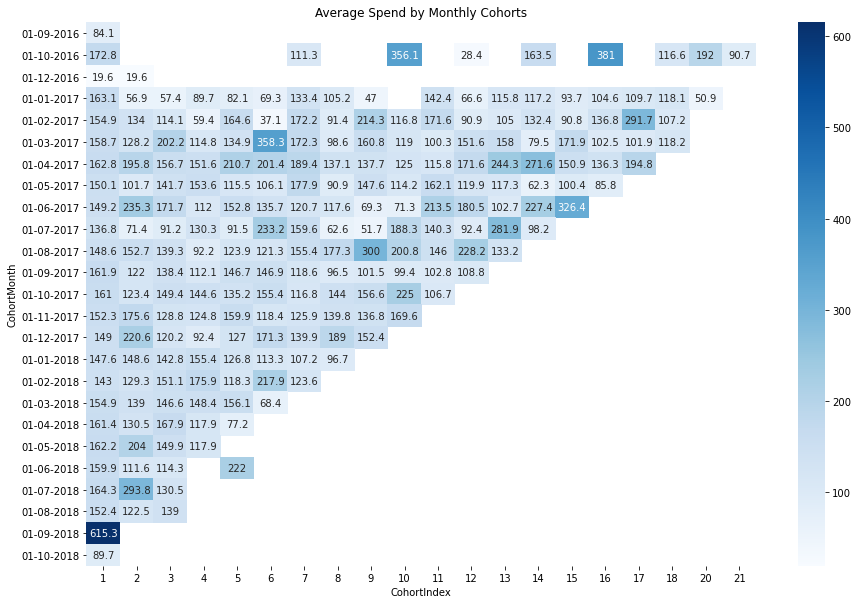

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.title('Average Spend by Monthly Cohorts')

# Create heatmap 
ax = sns.heatmap(average_payment, annot=True, cmap="Blues",  fmt='g', mask=average_payment.isnull())
ax.set_yticklabels(average_payment.index.strftime('%d-%m-%Y'))
plt.show()

# Recency, Frequency, Monetary Value analysis

In [19]:
# Create a hypothetical snapshot_day data as if we're doing analysis recently
print('Min:{}; Max:{}'.format(min(df_merged['order_purchase_timestamp']), max(df_merged['order_purchase_timestamp'])))

snapshot_date = max(df_merged['order_purchase_timestamp']) + dt.timedelta(days=1)

Min:2016-09-04 21:15:19; Max:2018-10-17 17:30:18


In [20]:
# Calculate Recency, Frequency and Monetary value for each customer 

rfm = df_merged.groupby(['customer_unique_id']).agg({
        'order_purchase_timestamp': lambda x : (snapshot_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'
})

rfm.rename(columns = {'order_purchase_timestamp':'Recency',
                      'order_id': 'Frequency',
                      'payment_value': 'Monetary Value'}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary Value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19
0000f46a3911fa3c0805444483337064,586,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
0004aac84e0df4da2b147fca70cf8255,337,1,196.89


In [21]:
(rfm[rfm['Frequency'] > 3].shape[0] / rfm.shape[0]) * 100

0.38919818929184663

## Building RFM segments

In [22]:
# Create labels for RFM
r_labels = range(3, 0, -1)
f_labels = range(1, 4)
m_labels = range(1, 4)

# Assign labels to four equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q=3, labels=r_labels)
f_groups = pd.qcut(rfm['Frequency'], q=[0, 0.95, 0.9904, 1.0], labels=f_labels)
m_groups = pd.qcut(rfm['Monetary Value'], q=3, labels=m_labels)

# Create new columns R, F, M 
rfm = rfm.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

def join_rfm(x):
    return str(int(x['R'])) + '-' +  str(int(x['F'])) + '-' + str(int(x['M']))

rfm['RFM Segment'] = rfm.apply(join_rfm, axis=1)

# Calculate RFM_score 
rfm['RFM_score'] = rfm[['R','F','M']].sum(axis=1)

In [23]:
rfm

,Recency,Frequency,Monetary Value,R,F,M,RFM Segment,RFM_score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,3,1,2,3-1-2,6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,3,1,1,3-1-1,5.0
0000f46a3911fa3c0805444483337064,586,1,86.22,1,1,2,1-1-2,4.0
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,1,1,1,1-1-1,3.0
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,3,2-1-3,6.0
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,496,1,2067.42,1,1,3,1-1-3,5.0
fffea47cd6d3cc0a88bd621562a9d061,311,1,84.58,2,1,2,2-1-2,5.0
ffff371b4d645b6ecea244b27531430a,618,1,112.46,1,1,2,1-1-2,4.0


## Largest RFM segments


In [24]:
rfm.groupby('RFM Segment').size().sort_values(ascending=False)

RFM Segment
3-1-3    10829
2-1-1    10816
3-1-2    10723
1-1-2    10719
1-1-1    10705
2-1-3    10518
2-1-2    10346
3-1-1    10288
1-1-3    10223
3-2-3      130
2-2-3       92
1-2-3       82
3-3-3       63
1-3-2       59
1-3-3       53
1-2-2       53
1-2-1       49
2-3-3       42
2-2-1       40
1-3-1       39
2-2-2       39
3-2-1       36
2-3-1       34
3-2-2       33
3-3-2       32
3-3-1       27
2-3-2       25
dtype: int64

## Filtering on RFM segments

In [25]:
rfm[rfm['RFM Segment'] == '3-3-3'][:5]

,Recency,Frequency,Monetary Value,R,F,M,RFM Segment,RFM_score
customer_unique_id,,,,,,,,
072a543c663f0b54b41af8b074162d62,63,5,207.21,3,3,3,3-3-3,9.0
075c65074dbbe8cc9fc87132c5e452b0,159,5,200.08,3,3,3,3-3-3,9.0
083ca1aa470c280236380973a48f77c6,65,4,320.26,3,3,3,3-3-3,9.0
08e5b38d7948d37fbb2a59fc5e175ab1,161,4,1056.33,3,3,3,3-3-3,9.0
12d8b5ed661190a3a08183644dfc504d,169,4,857.95,3,3,3,3-3-3,9.0


In [26]:
rfm[rfm['RFM Segment'] == '1-1-1'][:5]

,Recency,Frequency,Monetary Value,R,F,M,RFM Segment,RFM_score
customer_unique_id,,,,,,,,
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,1,1,1,1-1-1,3.0
0006fdc98a402fceb4eb0ee528f6a8d4,457,1,29.00,1,1,1,1-1-1,3.0
000bfa1d2f1a41876493be685390d6d3,384,1,46.85,1,1,1,1-1-1,3.0
00191a9719ef48ebb5860b130347bf33,547,1,58.86,1,1,1,1-1-1,3.0
001a2bf0e46c684031af91fb2bce149d,475,1,36.73,1,1,1,1-1-1,3.0


## Summary metrics per RFM score

In [27]:
rfm.groupby('RFM_score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary Value': ['mean','count']
}).round(1)

Recency Frequency Monetary Value       
             mean      mean           mean  count
RFM_score                                        
3.0         470.5       1.0           50.3  10705
4.0         370.8       1.0           79.4  21584
5.0         288.5       1.1          169.8  30989
6.0         199.4       1.1          213.5  21491
7.0         130.2       1.2          342.0  11059
8.0         152.2       3.9          419.9    204
9.0         120.3       5.6          596.6     63

## Defining customer segments

In [28]:
def rfm_level(df):
    if df['RFM_score'] >= 8:
        return 'Gold'
    elif df['RFM_score'] >= 5:
        return 'Silver'
    else:
        return 'Bronze'
    
# New variable RFM_level
rfm['Segment'] = rfm.apply(rfm_level, axis=1)

rfm.head()

,Recency,Frequency,Monetary Value,R,F,M,RFM Segment,RFM_score,Segment
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,161,1,141.90,3,1,2,3-1-2,6.0,Silver
0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,27.19,3,1,1,3-1-1,5.0,Silver
0000f46a3911fa3c0805444483337064,586,1,86.22,1,1,2,1-1-2,4.0,Bronze
0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62,1,1,1,1-1-1,3.0,Bronze
0004aac84e0df4da2b147fca70cf8255,337,1,196.89,2,1,3,2-1-3,6.0,Silver


## Analyzing customer segments

In [29]:
rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary Value': ['mean', 'count']
}).round(1).sort_values([('Monetary Value', 'mean')], ascending=False)

Recency Frequency Monetary Value       
           mean      mean           mean  count
Segment                                        
Gold      144.7       4.3          461.6    267
Silver    230.8       1.1          214.6  63539
Bronze    403.9       1.0           69.7  32289